In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm

# Load the data
data = pd.read_csv("C:\\Users\\mdfer\\OneDrive\\Documents\\School\Bellevue - MS\\03 Statistics for Data Science\\Student_Survey_AI.csv")

# Convert infinite values to NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of the dataset
data.head()

,Student_ID,Perceived_Understanding,Educational_Source_Internet,Educational_Source_Books_Papers,Educational_Source_Social_Media,Educational_Source_Discussions,Educational_Source_Uninformed,Impact_Dehumanization,Impact_Workforce_Replacement,Impact_Problem_Solving,...,Advantage_Teaching,Advantage_Learning,Primary_Advantage,Primary_Disadvantage,Sex,Years_of_Study,Major,All_Exams_Passed,USA_GPA,Romanian_GPA
0,1.0,8.0,True,True,False,False,False,Strongly Disagree,Disagree,Strongly Agree,...,Lesson engagement,Lesson personalization,Grading accuracy,Reduced teacher-student interactions,Female,3.0,Statistics and Economic Forecasting,True,3.8,9.2
1,2.0,7.0,True,False,True,False,False,Disagree,Neutral,Agree,...,Time management,Universal access,Grading automation,Internet addiction,Male,3.0,Statistics and Economic Forecasting,True,2.8,7.7
2,3.0,5.0,True,True,False,False,False,Disagree,Strongly Disagree,Agree,...,Lesson engagement,Student engagement,Student virtual assistance,Information loss,Male,3.0,Statistics and Economic Forecasting,False,2.4,7.2
3,4.0,5.0,True,False,True,False,False,Agree,Agree,Strongly Agree,...,Performs teaching,Universal access,Grading accuracy,Reduced teacher-student interactions,Female,3.0,Statistics and Economic Forecasting,True,3.2,8.2
4,5.0,4.0,True,False,False,False,False,Strongly Disagree,Disagree,Strongly Agree,...,Lesson engagement,Universal access,Student virtual assistance,Information loss,Female,3.0,Statistics and Economic Forecasting,True,2.8,7.7


In [167]:
# Ensure the correct conversion of 'All_Exams_Passed' to integer values
data['All_Exams_Passed'] = data['All_Exams_Passed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert binary categorical variables to numeric
binary_vars = ['Educational_Source_Internet', 'Educational_Source_Books_Papers', 'Educational_Source_Social_Media',
               'Educational_Source_Discussions', 'Educational_Source_Uninformed', 'Domain_Education', 'Domain_Medicine',
               'Domain_Agriculture', 'Domain_Constructions', 'Domain_Marketing', 'Domain_Administration', 'Domain_Art', 
               'All_Exams_Passed']

for var in binary_vars:
    # Fill NaN values with 0 (or another appropriate value) before converting
    data[var] = data[var].fillna(0).astype(int)

# Convert categorical variables to numeric using get_dummies
categorical_vars = ['Primary_Advantage', 'Primary_Disadvantage', 'Sex', 'Feeling']

data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Replace ordinal strings with numeric values for impact variables
impact_vars = ['Impact_Dehumanization', 'Impact_Workforce_Replacement', 'Impact_Problem_Solving', 'Impact_Societal_Governance',
               'Impact_Cost', 'Impact_Economic_Crisis', 'Impact_Economic_Growth', 'Impact_Job_Loss']

impact_mapping = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}

for var in impact_vars:
    data[var] = data[var].map(impact_mapping).fillna(0).astype(int)

# Convert boolean columns to integer
bool_cols = data.select_dtypes(include='bool').columns
for col in bool_cols:
    data[col] = data[col].astype(int)

# Ensure all data types are numeric for the regression analysis
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in the relevant columns for regression
data.dropna(subset=independent_vars + ['USA_GPA'], inplace=True)

# Display the first few rows of the dataset after transformation
print(data.dtypes)
data.head()

Student_ID                                                   float64
Perceived_Understanding                                      float64
Educational_Source_Internet                                    int32
Educational_Source_Books_Papers                                int32
Educational_Source_Social_Media                                int32
Educational_Source_Discussions                                 int32
Educational_Source_Uninformed                                  int32
Impact_Dehumanization                                          int32
Impact_Workforce_Replacement                                   int32
Impact_Problem_Solving                                         int32
Impact_Societal_Governance                                     int32
Impact_Cost                                                    int32
Impact_Economic_Crisis                                         int32
Impact_Economic_Growth                                         int32
Impact_Job_Loss                   

,Student_ID,Perceived_Understanding,Educational_Source_Internet,Educational_Source_Books_Papers,Educational_Source_Social_Media,Educational_Source_Discussions,Educational_Source_Uninformed,Impact_Dehumanization,Impact_Workforce_Replacement,Impact_Problem_Solving,...,Romanian_GPA,Primary_Advantage_Grading automation,Primary_Advantage_Student virtual assistance,Primary_Disadvantage_Internet addiction,Primary_Disadvantage_Reduced teacher-student interactions,Primary_Disadvantage_Teacher-student disconnect,Sex_Male,Feeling_Fear,Feeling_Indifference,Feeling_Trust
0,1.0,8.0,1,1,0,0,0,1,2,5,...,9.2,0,0,0,1,0,0,0,0,0
1,2.0,7.0,1,0,1,0,0,2,3,4,...,7.7,1,0,1,0,0,1,0,0,0
2,3.0,5.0,1,1,0,0,0,2,1,4,...,7.2,0,1,0,0,0,1,0,0,0
3,4.0,5.0,1,0,1,0,0,4,4,5,...,8.2,0,0,0,1,0,0,0,0,0
4,5.0,4.0,1,0,0,0,0,1,2,5,...,7.7,0,1,0,0,0,0,0,0,0


C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


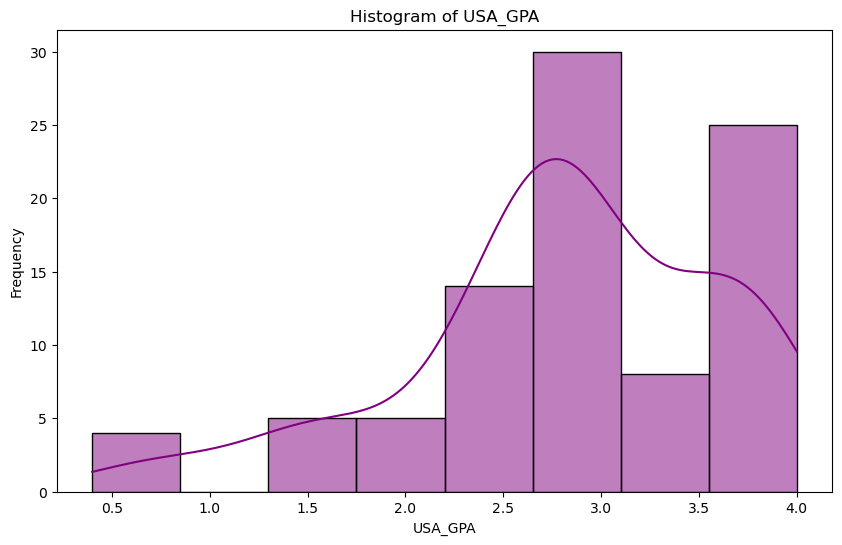

USA_GPA - Mean: 2.8043956043956046, Mode: 2.8, Std: 0.8033142581292813


C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


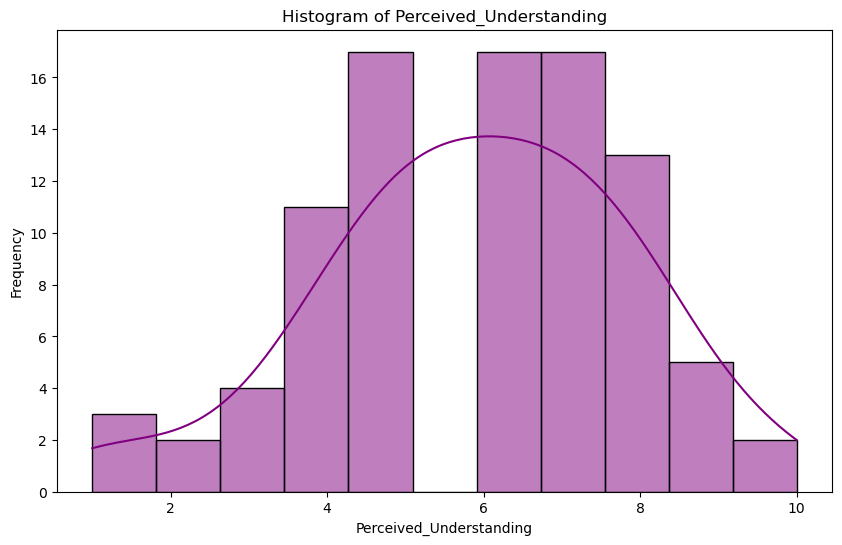

Perceived_Understanding - Mean: 5.912087912087912, Mode: 5.0, Std: 1.9700442840389363


C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


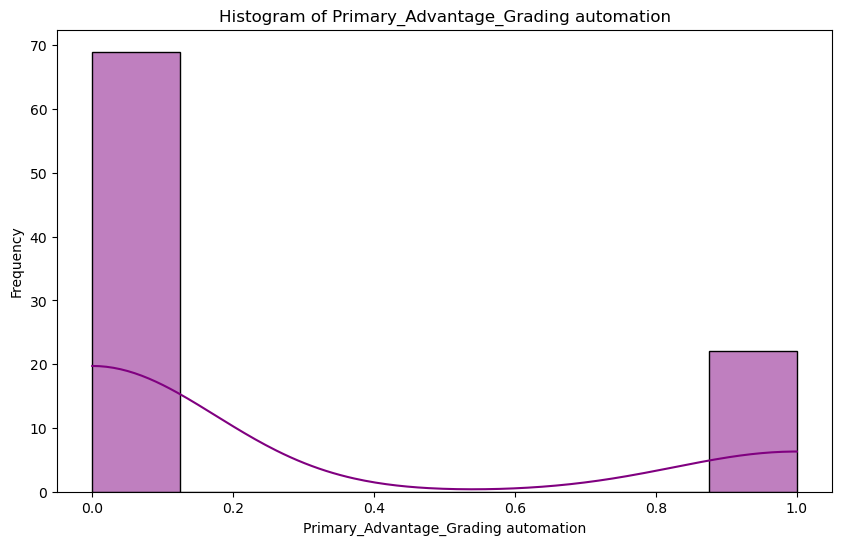

Primary_Advantage_Grading automation - Mean: 0.24175824175824176, Mode: 0, Std: 0.4305205980530844


C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


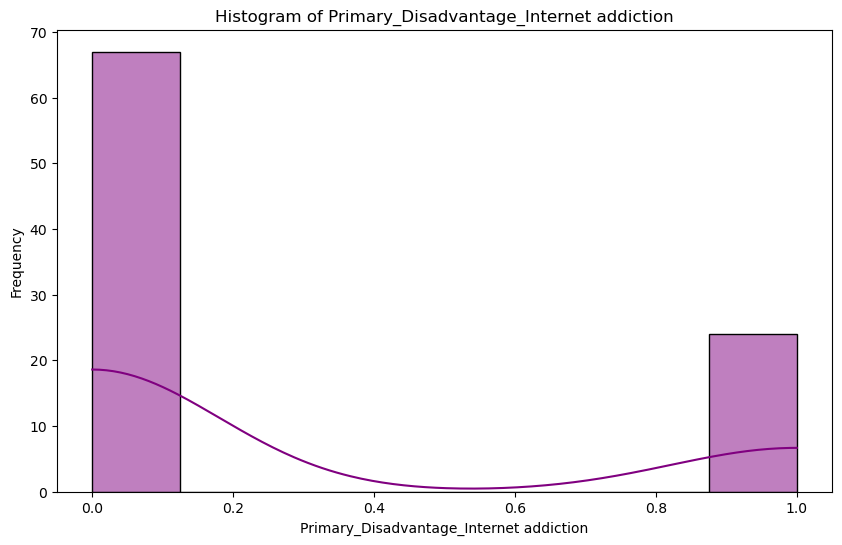

Primary_Disadvantage_Internet addiction - Mean: 0.26373626373626374, Mode: 0, Std: 0.44309930753387156


C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


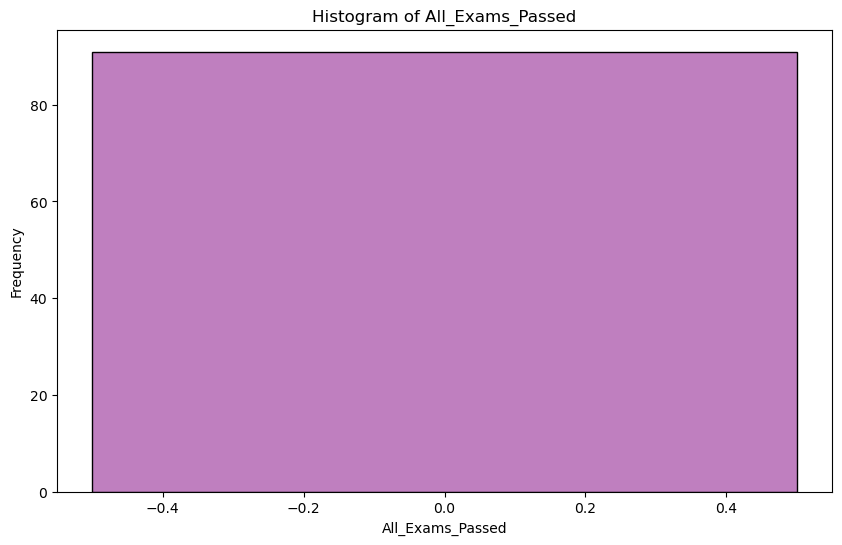

All_Exams_Passed - Mean: 0.0, Mode: 0, Std: 0.0


In [168]:
# Histograms and descriptive statistics for each variable
variables = ['USA_GPA', 'Perceived_Understanding', 'Primary_Advantage_Grading automation', 'Primary_Disadvantage_Internet addiction', 'All_Exams_Passed']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var].dropna(), kde=True, color='purple')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    
    mean_value = data[var].mean()
    mode_value = data[var].mode()[0] if not data[var].mode().empty else 'No mode'
    std_value = data[var].std()
    print(f'{var} - Mean: {mean_value}, Mode: {mode_value}, Std: {std_value}')

C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


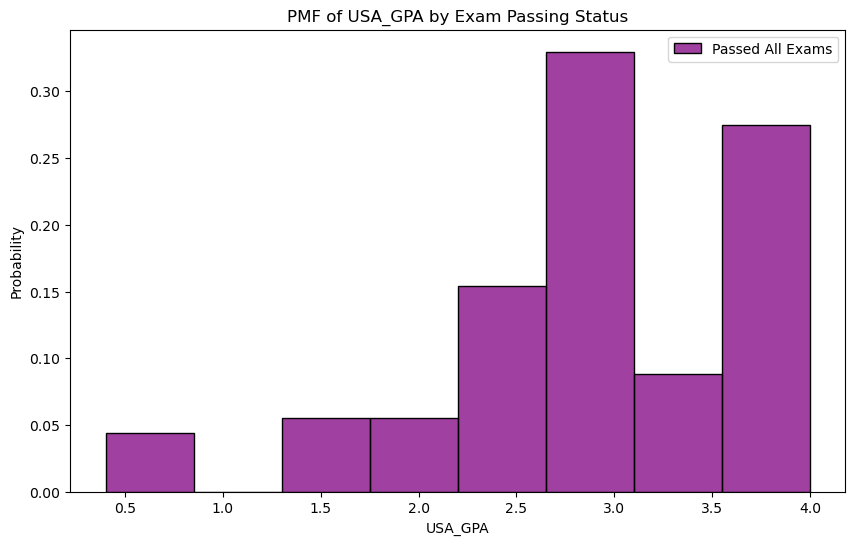

In [176]:
# Ensure the correct conversion of 'All_Exams_Passed' to integer values
data['All_Exams_Passed'] = data['All_Exams_Passed'].apply(lambda x: 1 if x == 'Yes' else 0)

# PMF for USA_GPA with filter on All_Exams_Passed
passed = data[data['All_Exams_Passed'] == 1]['USA_GPA'].dropna()
not_passed = data[data['All_Exams_Passed'] == 0]['USA_GPA'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(passed, kde=False, stat='probability', color='green', label='Passed All Exams')
sns.histplot(not_passed, kde=False, stat='probability', color='purple', label='Passed All Exams')
plt.title('PMF of USA_GPA by Exam Passing Status')
plt.xlabel('USA_GPA')
plt.ylabel('Probability')
plt.legend()
plt.show()

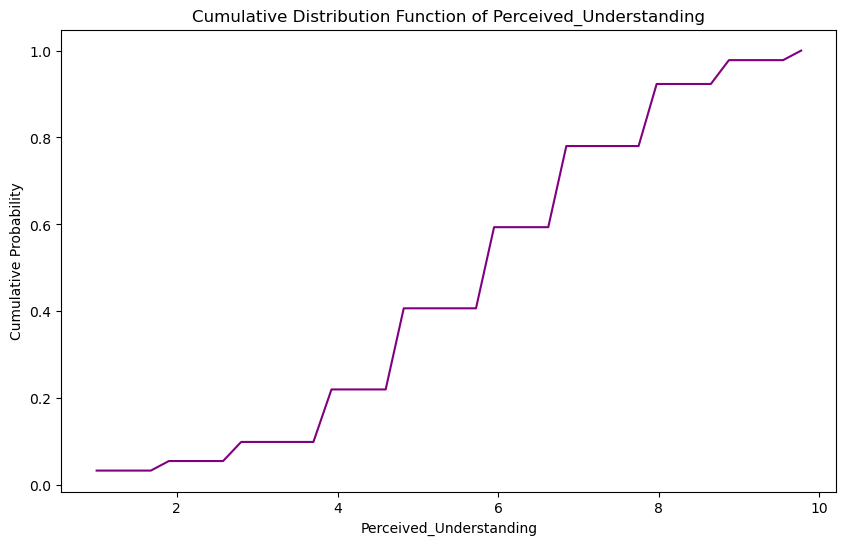

In [170]:
# CDF for Perceived_Understanding
def plot_cdf(data, variable):
    values, base = np.histogram(data[variable].dropna(), bins=40)
    cumulative = np.cumsum(values) / sum(values)
    plt.figure(figsize=(10, 6))
    plt.plot(base[:-1], cumulative, c='purple')
    plt.title(f'Cumulative Distribution Function of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Cumulative Probability')
    plt.show()

plot_cdf(data, 'Perceived_Understanding')

C:\Users\mdfer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


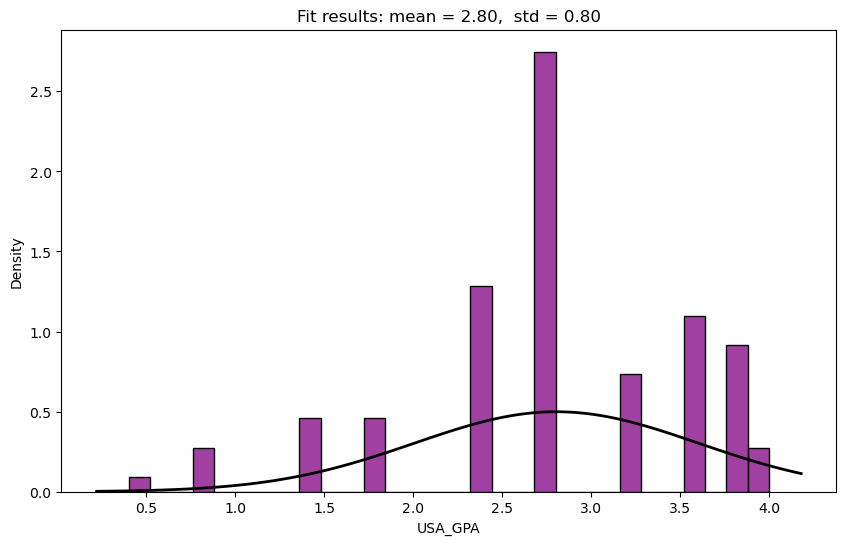

In [171]:
# Fit a normal distribution to the data
mean, std = stats.norm.fit(data['USA_GPA'].dropna())
plt.figure(figsize=(10, 6))
sns.histplot(data['USA_GPA'].dropna(), kde=False, stat='density', bins=30, color='purple')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mean = %.2f,  std = %.2f' % (mean, std))
plt.xlabel('USA_GPA')
plt.ylabel('Density')
plt.show()

In [172]:
# Inspect columns to find the dummy variable names
print(data.columns)

Index(['Student_ID', 'Perceived_Understanding', 'Educational_Source_Internet',
       'Educational_Source_Books_Papers', 'Educational_Source_Social_Media',
       'Educational_Source_Discussions', 'Educational_Source_Uninformed',
       'Impact_Dehumanization', 'Impact_Workforce_Replacement',
       'Impact_Problem_Solving', 'Impact_Societal_Governance', 'Impact_Cost',
       'Impact_Economic_Crisis', 'Impact_Economic_Growth', 'Impact_Job_Loss',
       'Domain_Education', 'Domain_Medicine', 'Domain_Agriculture',
       'Domain_Constructions', 'Domain_Marketing', 'Domain_Administration',
       'Domain_Art', 'Educational_Utility', 'Advantage_Teaching',
       'Advantage_Learning', 'Years_of_Study', 'Major', 'All_Exams_Passed',
       'USA_GPA', 'Romanian_GPA', 'Primary_Advantage_Grading automation',
       'Primary_Advantage_Student virtual assistance',
       'Primary_Disadvantage_Internet addiction',
       'Primary_Disadvantage_Reduced teacher-student interactions',
       'Primary_D

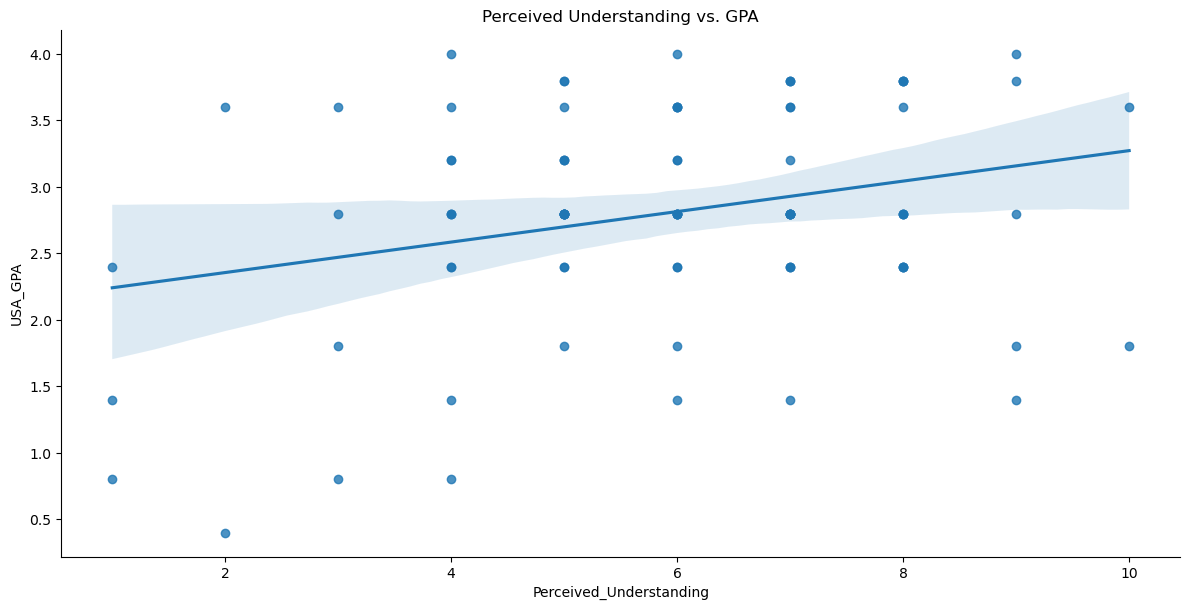

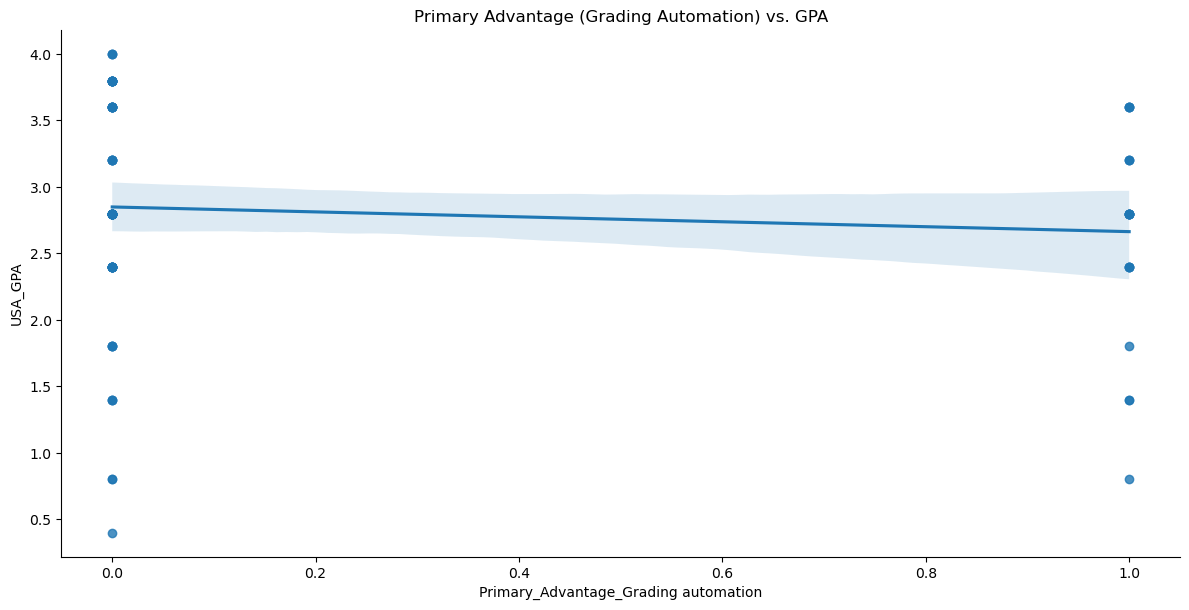

In [173]:
# Scatter plots with regression lines
sns.lmplot(x='Perceived_Understanding', y='USA_GPA', data=data, aspect=2, height=6)
plt.title('Perceived Understanding vs. GPA')
plt.show()

# Update this with the correct dummy variable name
sns.lmplot(x='Primary_Advantage_Grading automation', y='USA_GPA', data=data, aspect=2, height=6)
plt.title('Primary Advantage (Grading Automation) vs. GPA')
plt.show()

In [174]:
# Hypothesis testing example: t-test between two groups
t_stat, p_value = stats.ttest_ind(passed, not_passed)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: nan, P-value: nan


In [175]:
# Define the dependent and independent variables
independent_vars = ['Perceived_Understanding', 'All_Exams_Passed']

# Get all the dummy variable column names for Primary_Advantage and Primary_Disadvantage
primary_advantage_vars = [col for col in data.columns if col.startswith('Primary_Advantage')]
primary_disadvantage_vars = [col for col in data.columns if col.startswith('Primary_Disadvantage')]

# Combine all independent variables
independent_vars.extend(primary_advantage_vars)
independent_vars.extend(primary_disadvantage_vars)

X = data[independent_vars]
y = data['USA_GPA']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Ensure X and y are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                USA_GPA   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.354
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.243
Time:                        12:12:13   Log-Likelihood:                -104.49
No. Observations:                  91   AIC:                             223.0
Df Residuals:                      84   BIC:                             240.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------